**Умова:**

До пункту видачі надійшли вироби з такими характеристиками: 
Всього виробів - 13000 одиниць, з них виготовлено на першому заводі - 8000 од., вагою 13 кг., зі стандартним відхиленням по вазі 0.5 кг. На другому - 5000 од., вагою 12 кг., зі стандартним відхиленням по вазі 0.7 кг. Доля якісних виробів, вироблених на першому заводі, становить 0.85. Доля якісних виробів, вироблених на другому заводі 0.8.

Завдання:

Напишіть код, з використанням ЕМ -алгоритму, для визначення ймовірності, на якому заводі був вироблений виріб.

In [27]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

data = np.concatenate((np.random.normal(loc=13, scale=0.5, size=8000), np.random.normal(loc=12, scale=0.7, size=5000)))
data = data.reshape(-1, 1)
display(data)

array([[13.15710362],
       [13.32679866],
       [12.97417631],
       ...,
       [12.14095757],
       [12.3904787 ],
       [11.96250014]])

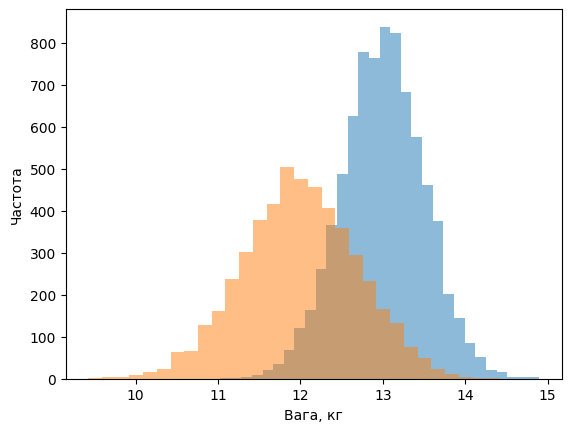

In [28]:
plt.hist(data[:8000], bins=30, alpha=0.5)
plt.hist(data[8000:], bins=30, alpha=0.5)
plt.xlabel("Вага, кг")
plt.ylabel("Частота")
plt.show()

In [3]:
model = GaussianMixture(n_components=2, max_iter=1000)
model.fit(data)

GaussianMixture(max_iter=1000, n_components=2)

In [15]:
means = model.means_                # середнє значення ваги деталі
stds = np.sqrt(model.covariances_)  # стандартне відхилення деталі
stds = stds.reshape(-1, 1)
weights = model.weights_            # оцінка ваги приналежності об'єкта до даного кластеру

In [29]:
print("Середнє значення: ")
print(f"Завод 1: {means[0][0]:.2f}кг, Завод 2: {means[1][0]:.2f} кг")
print("Стандартне відхилення: ")
print(f"Завод 1: {stds[0][0]:.2f}кг, Завод 2 : {stds[1][0]:.2f} кг")
print("Ймовірність визначення заводу: ")
print(f"Завод 1: {weights[0]:.2f}, Завод 2 : {weights[1]:.2f}")


Середнє значення: 
Завод 1: 11.90кг, Завод 2: 13.01 кг
Стандартне відхилення: 
Завод 1: 0.64кг, Завод 2 : 0.49 кг
Кількість деталей: 
Завод 1: 0.35, Завод 2 : 0.65


**Результат виявився для мене досить неочікуваним, але, якщо розібратися, то ймовірність залежить не тільки від кількості, а і від стандартного відхилення. В даному випадку, ваги деталей, що вироблені на заводі 2, мають більше стандартне відхилення, що призводить до більшої невизначенності при виявленні параметрів розподілу ваги деталей.**